# Session 10: Probability Distributions

Note: you can use Python to help crunch numbers in this Handout. However, the core learning point here is the math and not the coding.

### Q1 (Investment Portfolio)

An investment consultant believes that the probability distribution of the return on investment (in percent per year) on a certain portfolio is given in the below table.

| Returns on investment | Probability | 
|--|--|
|9|0.07|
|10|0.15|
|11|0.23|
|12|0.25|
|13|0.15|
|14|0.12|
|15|0.03|

**a)** What is the probability that the porfolio's return will be at least 12\%?

Let $X$ be a random variable denoting the portfolio's return in percent.

$$P(X \ge 12) = 0.25+0.15+0.12+0.03 = 0.55$$

**b)** What is the probability that the return will be between 10\% and 13\% (inclusive)?

$$ P(10 \le X \le 15) = 0.15+0.23+0.25+0.15 = 0.78$$

**c)** What is the expected return?

$$E(X)=(9)(0.07)+(10)(0.15)+(11)(0.23)+(12)(0.25)+(13)(0.15)+(14)(0.12)+(15)(0.03)=11.74$$

Here's the computation in Python

In [8]:
p=[0.07,0.15,0.23,0.25,0.15,0.12,0.03]
x=[9,10,11,12,13,14,15]
total=0
for i in range(len(p)):
    total+=p[i]*x[i]
total

11.739999999999998

**d)** What is the variance and standard deviation of the returns?

$$Var(X) = (9-11.74)^2(0.07)+(10-11.74)^2(0.15)+\cdots+(15-11.74)^2(0.03) \approx 2.29 $$

$$SD(X) = \sqrt{Var(X)} \approx 1.51 $$

In [10]:
import numpy as np
expectation=11.74
total=0
for i in range(len(p)):
    total+=p[i]*(x[i]-expectation)**2
print('Variance is', total)
print('Standard deviation is',np.sqrt(total))

Variance is 2.2923999999999998
Standard deviation is 1.514067369703211


### Q2 (Quality Control) 
A factory manufactures 200 units per hour. According to past data, each unit is of good quality with probability 0.95, independent of other units. 

**a)** What is the expected number of bad quality units produced in a 4 hour shift?

Let $X$ be a random variable representing the number of bad quality units in a shift. Note that $X$ has a binomial distribution with parameters $n=200\times 4=800$ and $p=1-0.95=0.05$.

$$E[X] = np = (800)(0.05) = 40.$$

**b)** What is the standard deviation of the number of bad quality units produced in a shift?

$$SD(X)= \sqrt{np(1-p)} = \sqrt{(800)(0.05)(0.95)} \approx 6.16. $$

**c)** What is the probability that there are (strictly) less than 30 bad units produced in a shift?

Let $F(t)$ be the CDF of $X$. The desired probability is 

$$P(X < 30) = P(X \le 29) = F(29) \approx 3.94\%$$

In [16]:
from scipy.stats import binom
dist=binom(n=800,p=0.05)
dist.cdf(29)

0.0394300133504324

**d)** What is the probability that there are between 30 and 50 bad units produced in a shift (inclusive)?

$$P(30\le X \le 50) = P(X \le 50) - P(X \le 29) = F(50)-F(29) \approx 91.2\%.$$

In [17]:
dist.cdf(50)-dist.cdf(29)

0.9124035773633103

**e)** What is the probabiltiy that (strictly) more than 55 bad units produced in a shift?

$$ P(X > 55)= 1-P(X \le 55)=1-F(55)\approx 0.8\% $$

In [18]:
1-dist.cdf(55)

0.008101837261600964

### Q3 (Sports Analytics)
The men's 100 meter sprint at the 1996 Olympic Games in Atlanta was a hotly contested event between Donovan Bailey of Canada, Frankie Fredericks of Namibia, and Ato Boldon of Trinidad. Assume that for all three runners, the probability distribution of the time to run the race a (continuous) uniform distribution between 9.75 and 9.95 seconds, and that the running times are independent.

**a)** What is the probability that Donovan Bailey's time will beat the previous record of 9.86 seconds?

Let $X$ be a uniformly distributed random variable between 9.75 and 9.95. Let $F(t)$ be the CDF of $X$. The desired probability is 

$$P(X \le 9.86) = F(9.86) = \frac{9.86-9.75}{9.95-9.75} = 0.55$$

You can also use the CDF from scipy.stats.

In [23]:
from scipy.stats import uniform
dist=uniform(loc=9.75,scale=9.95-9.75)
dist.cdf(9.86)

0.5499999999999992

**b)** What is the probability that the winning time will beat the previous record of 9.86 seconds?

We first calculate the probability that the winning time will not beat this record, which means that each of the runners exceeds this time. Because of independence, this probability is equal to 

$$P(X \ge 9.86)^3 = (1-0.55)^3 \approx 9.1\%$$

Therefore, the probability that someone will beat this record is 

$$ 1- 9.1\% = 90.9\%. $$

Using Python, we can simulate the CDF distribution of the winning time. 

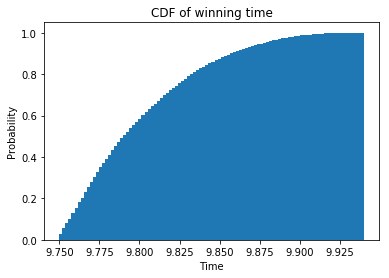

In [40]:
times=dist.rvs(size=(10000,3))
winning=times.min(axis=1)
import matplotlib.pyplot as plt
plt.hist(winning,bins=100,cumulative=True,density=True)
plt.title('CDF of winning time')
plt.ylabel('Probability')
plt.xlabel('Time')
plt.show()

### Q4 (Demand Estimation)

A marketing team would like to estimate the demand for a new product before its launch. They have segmented the market into 4 segments. The number of customers of each segment and the estimated purchase probabilties are as below. (Assume that each potential customer makes their purchase decision independently.)

| Segment | # of Customers | Purchase Probability |
|--|--|--|
| A | 10000 | 0.1 |
| B | 5000 | 0.3 |
| C | 300 | 0.9 |

**a)** What is the mean and standard deviation of the total demand for the product?

Let $X$ a random variable denoting the total demand, and let $Y_A$, $Y_B$ and $Y_C$ be Bernoulli random variables denoting whether a random customer of each type would purchase. By linearity of expecations

$$E[X]=10000E[A]+5000E[B] + 300 E[C] = (10000)(0.1)+(5000)(0.3)+(300)(0.9) = 2770,$$
$$Var(X)=10000Var(A)+5000Var(B) + 300 Var(C) = (10000)(0.1)(0.9)+(5000)(0.3)(0.7)+(300)(0.9)(0.1) = 1977,$$
$$SD(X)=\sqrt{Var(X)} \approx 44.46.$$


**b)** Use the normal approximation to estimate the probability that demand is less than $2500$. 

Let $F(t)$ be the CDF of a normally distributed random variable with $\mu=2770$ and $\sigma=44.46$. The desired probability is 

$$F(2500) \approx 0$$

Alternatively, if $G(t)$ is the CDF of a standard normal random variable, then the desired probability is 

$$G(\frac{2500-2770}{44.46}) = G(-4.50) \approx 0.$$

In [48]:
from scipy.stats import norm
norm(2770,44.46).cdf(2500)

6.282032541388662e-10

**c)** Use the normal approximation to estimate the probability that the demand is more than $2800$. 

Let $F(t)$ be as above, the desired probability is 

$$1-F(2800) \approx 25\%.$$

Alternatively, 

$$1- G(\frac{2800-2770}{44.46}) \approx 25\%.$$

In [49]:
1-norm(2770,44.46).cdf(2800)

0.2499129110656595